## Домашнее задание 2, задача 4

Требовалось визуализировать сходимость апостериорного распределения к априорному в зависимости от количества итераций оптимизации гиперпараметров. Задача решалась для синтетической выборки, порождаемой 
$\textbf{y} \sim N(f(\textbf{X,w}) = \textbf{Xw},~ \beta^{-1});~ w \sim N(0,\textbf{A}^{-1})$. $\textbf{X}$ генерировалась при этом из равномерного распределения на $[0,1]$.Здесь для простоты предполагается, что $A$ -- диагональная матрица с равными членами на диагонали(секция 3.1 из статьи). Тогда процесс оптимизации задается следующими формулами:
$\gamma = \beta\sum\limits_{j=1}^n \frac{\beta h_j}{\beta h_j + \alpha}$

$\alpha = \frac{\gamma}{\textbf{||w||}^2}$

$\beta = \frac{m - \gamma}{||\textbf{y} - f(\textbf{X,w})||^2}$

Процесс генерации $\textbf{X,w,y}$ уже описан. В формулах выше $\textbf{w}= \textbf{w_{opt}}$, но как показала практика, для демонстрации можно полагать их равными в алгоритме, хоть и в реальности, не зная реального $\textbf{w}$ мы бы его вычисляли. Используется линейная модель с лекции, оттуда же взята формула гессиана, собственные значения которого используются в первой формуле.

Для демонстрации сходимости строится 2 графика - первый показывает значение параметра матрицы в зависимости от итерации алгоритма, а второй - KL дивергенцию между распределениями на последовательных итерациях. Заметим, что оба графика иллюстрируют сходимость распределений

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

%matplotlib inline




In [170]:
def generate_X(d1,d2):# m = d1, n = d2
    X = []
    for i in range(d1):
        X.append(uniform.rvs(size=d2))
    return np.array(X)
def generate_w(d2,a): 
    return np.array(norm.rvs(0,a,d2))
def generate_y(X,w,b,d1,d2):
    return multivariate_normal.rvs(X.dot(w),np.eye(d1)*b)
def get_KL(a1,a2,d2):
    return (1/2*( d2*a1/a2 - d2 + d2*np.log(a2/a1)))
def plot_a_b(a_init,a,b_init,b,X,w,y,n_iter,d1,d2):
    a = a_init
    b = b_init
    a_arr = []
    b_arr = []
    H = X.transpose().dot(X)
    eigenvalues, eigenvectors = np.linalg.eig(H)
    for i in range(n_iter):
        gamma = np.sum(b*eigenvalues/(b*eigenvalues + a))
        a = gamma/(np.linalg.norm(w)**2)
        b = (d1 - gamma)/(np.linalg.norm(y - X.dot(w))**2)
        a_arr.append(a)
        b_arr.append(b)
    return(np.array(a_arr),np.array(b_arr))
def for_interaction(a_real,b_real,d1,d2,n_iter):
    X = generate_X(d1,d2)
    w = generate_w(d2,1/a_real)
    y = generate_y(X,w,1/b_real,d1,d2)
    a_arr,b_arr = plot_a_b(1,a_real,1,b_real,X,w,y,n_iter,d1,d2)
    plt.xlabel("Номер итерации")
    plt.ylabel("a:A = aI")
    x = np.linspace(1,n_iter,n_iter)
    plt.plot(x, a_arr**(0.5), label = 'Значение параметра матрицы A')
    plt.grid()
    plt.legend()
def for_interactionKL(a_real,b_real,d1,d2,n_iter):
    X = generate_X(d1,d2)
    w = generate_w(d2,1/a_real)
    y = generate_y(X,w,1/b_real,d1,d2)
    a_arr,b_arr = plot_a_b(1,a_real,1,b_real,X,w,y,n_iter,d1,d2)
    plt.xlabel("Номер итерации")
    plt.ylabel("Значение KL")
    x = np.linspace(1,n_iter-1,n_iter-1)
    y = []
    for i in range(n_iter - 1):
        y.append(get_KL(1/a_arr[i],1/a_arr[i+1],d2))
    plt.plot(x, y, label = 'KL между распределениями соседних итераций')
    plt.grid()
    plt.legend()

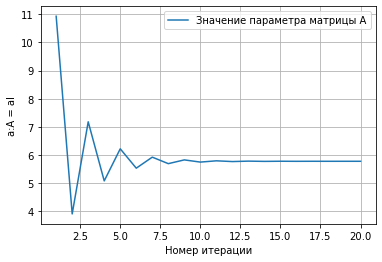

In [184]:
for_interaction(10,1,100,10,20)

Из 2 графиков -- ниже и выше:алгоритм сходится примерно за 10 итераций. Это не меняется при запуске интерактивного графика в конце. Похожий результат мы видим и на графике ниже(напомню, что несмотря на равные параметры в скобках из-за случайности это графики не для одних и тех же данных. Можно было их совместить, но эксперименты в том виде как я их провожу все равно не возобновляемы, так как я не фиксировал seed). Однако в статье из ссылки к заданию алгоритм сходился уже на второй итерации. Тем не менее, там был приведен только один график и я полагаю, что это могло получиться случайно - иногда и запуск моего кода может дать похожий результат, но это происходит редко(либо на вполне определенных данных - малых a,b). Последнее также означает, что обычно получаются графики похожие на продемонстрированный выше. Также стоит отметить, что получившийся на графике параметр A не равен исходному- в статье между ними получалось достаточно большое отклонение. Относительное же отклонение примерно соответствует описанному в статье. 

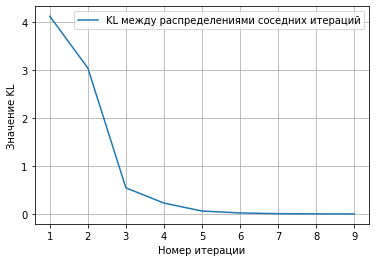

In [185]:
for_interactionKL(10,1,100,10,10)

In [168]:
interact(for_interaction, a_real = widgets.FloatSlider(value = 10, ## элемент матрицы A^-1
                                               min = 0.1,
                                               max = 100,
                                               step = 0.1) , 
                       b_real  = widgets.FloatSlider(value = 10, ## элемент b^-1
                                               min = 0.1,
                                               max = 100,
                                               step = 0.1), 
                       d1  = widgets.IntSlider(value = 100,   ## число объектов
                                               min = 10,
                                               max = 1000,
                                               step = 10), 
                       d2  = widgets.IntSlider(value = 10,   ##число признаков
                                               min = 1,
                                               max = 100,
                                               step = 1),
                       n_iter  = widgets.IntSlider(value = 10, ##число итераций оптимизации
                                               min = 2,
                                               max = 100,
                                               step = 1))

interactive(children=(FloatSlider(value=10.0, description='a_real', min=0.1), FloatSlider(value=10.0, descript…

<function __main__.for_interaction(a_real, b_real, d1, d2, n_iter)>

In [169]:
interact(for_interactionKL, a_real = widgets.FloatSlider(value = 10,
                                               min = 0.1,
                                               max = 100,
                                               step = 0.1) , 
                       b_real  = widgets.FloatSlider(value = 10,
                                               min = 0.1,
                                               max = 100,
                                               step = 0.1), 
                       d1  = widgets.IntSlider(value = 100,
                                               min = 10,
                                               max = 1000,
                                               step = 10), 
                       d2  = widgets.IntSlider(value = 10,
                                               min = 1,
                                               max = 100,
                                               step = 1),
                       n_iter  = widgets.IntSlider(value = 10,
                                               min = 2,
                                               max = 100,
                                               step = 1))

interactive(children=(FloatSlider(value=10.0, description='a_real', min=0.1), FloatSlider(value=10.0, descript…

<function __main__.for_interactionKL(a_real, b_real, d1, d2, n_iter)>